In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import PBMethods as PM

from IPython.display import clear_output

Total Collision: 10


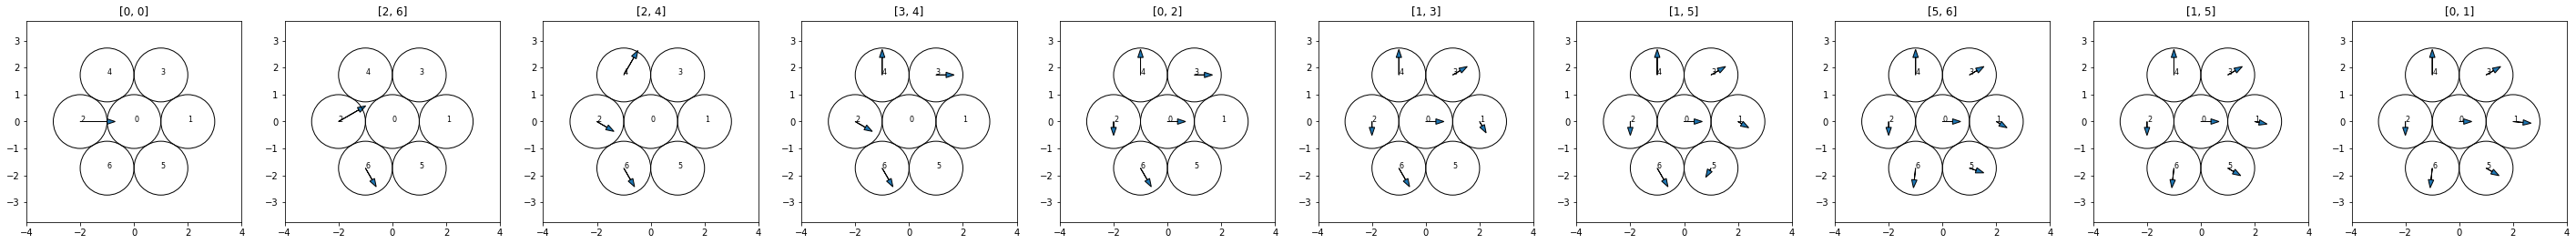

In [2]:
# input and setup
r = 1
center_x = np.array([0, 2, -2, 1, -1, 1, -1])
center_y = np.array([0, 0, 0, np.sqrt(3), np.sqrt(3), -np.sqrt(3), -np.sqrt(3)])
v_x = np.array([0, 0, 1, 0, 0, 0, 0])
v_y = np.array([0, 0, 0, 0, 0, 0, 0])
PM.pinned_random_model(center_x, center_y, v_x, v_y, r)

In [57]:
# setup_edgs with overlapping allowed. 
def rough_edges(center_x, center_y):
    edges = np.zeros((len(center_x), len(center_x)))

    # If ball n and ball m are touching, edges(n, m) = 1 only when n < m, else edges(n, m) = 0.
    # diagonal entries are automatically 0, as a ball is not allowed to collide with itself.
    for i in range(len(center_x)):
        for j in range(i, len(center_x)):
            x_i = np.array([center_x[i], center_y[i]])
            x_j = np.array([center_x[j], center_y[j]])
            if i != j:
                # allow an error of 1e-15 to accomodate for numerical error
                if np.linalg.norm(x_i-x_j) < (2*r + 1e-15):
                    edges[i, j] = 1
    return edges

def pairwise_collidable(i, j, center_x, center_y, v_x, v_y, r):
    if v_x[i] == 0:
#         if i have no velocity, we skip, as i and j will be tested in both directions
        if v_y[i] != 0:
#             if i's velocity is vertical, the test case below should suffice
            sameSign = (v_y[i] * (center_y[j]-center_y[i])) > 0
            if i != j and np.abs(center_x[j]) < (2*r + 1e-15) and sameSign:
                return True    
    elif v_x[j] == 0 and v_y[j] == 0:
#         if j has no velocity, 
        slope = v_y[i]/v_x[i]
        distance = np.abs(-slope*center_x[j]+center_y[j]-center_y[i]+slope*center_x[i])/np.sqrt(slope**2+1)
        if distance < (2*r + 1e-15):
            return True
    
# #     find hit point
# #     We construct the trajectory of ball i and the center of ball j projected to the trajectory of ball i
#     x_hit = (c3+slope * c4 + slope**2*c1-slope*c2)/(slope**2+1)
    

def collidable(center_x, center_y, v_x, v_y, r):
    for i in range(len(center_x)):
        if v_x[i] == 0:
            for j in range(len(center_x)):
#                 check if the direction i is travelling is the same direction as j is at relative to i.
#                 this also automatically filters out when v_y[i] = 0.
                sameSign = (v_y[i] * (center_y[j]-center_y[i])) > 0
                if i != j and np.abs(center_x[j]) < (2*r + 1e-15) and sameSign:
#                     print(i, ',', j, 'can still collide')
                    return True        
        else:
            slope = v_y[i]/v_x[i]
#             for each ball, we get its trajectory in the form of a line
#             then see if anyball is on its trajectory by checking if 
#             the distnace between the trajectory and any ball is less than r.
            for j in range(len(center_x)):
#             use point-slope formulation of a line, then convert to ax+by+c=0
#             Distance = (| a*x1 + b*y1 + c |) / (sqrt( a*a + b*b))
                distance = np.abs(-slope*center_x[j]+center_y[j]-center_y[i]+slope*center_x[i])/np.sqrt(slope**2+1)
#                 print('distance between',i , 'and', j, 'is', distance)
                sameSign = (v_y[i] * (center_y[j]-center_y[i])) > 0 or (v_x[i] * (center_x[j]-center_x[i])) > 0
                print('testing', i, j)
                print(sameSign)
                if distance < (2*r + 1e-15) and i != j and sameSign:
                    print(i, ',', j, 'can still collide')
                    return True
    return False

In [77]:
r = 1
delta = 0.01
center_x = np.array([0, 2, 1])
center_y = np.array([0, 0, -np.sqrt(3)])
v_x = np.array([0, 0, 0])
v_y = np.array([0, 0, 1])
v_xs = [v_x]
v_ys = [v_y]
step = [[0, 0]]
print('collide', collidable(center_x, center_y, v_x, v_y, r))

edges = rough_edges(center_x, center_y)
collide = PM.all_collision(edges, center_x, center_y, v_x, v_y, r)

v_x2, v_y2 = PM.perform_collision(collide[0][0], collide[0][1], edges, center_x, center_y, v_x, v_y)

v_xs.append(v_x2)
v_ys.append(v_y2)
step.append([[collide[0][0], collide[0][1]]])

v_x = v_x2
v_y = v_y2

print('collide', collidable(center_x, center_y, v_x, v_y, r))

edges = rough_edges(center_x, center_y)
collide = PM.all_collision(edges, center_x, center_y, v_x, v_y, r)

v_x2, v_y2 = PM.perform_collision(collide[0][0], collide[0][1], edges, center_x, center_y, v_x, v_y)

v_xs.append(v_x2)
v_ys.append(v_y2)
step.append([[collide[0][0], collide[0][1]]])

v_x = v_x2
v_y = v_y2

print('collide', collidable(center_x, center_y, v_x, v_y, r))

collide True
testing 0 0
False
testing 0 1
False
testing 0 2
False
testing 2 0
True
2 , 0 can still collide
collide True
testing 0 0
False
testing 0 1
False
testing 0 2
False
testing 1 0
False
testing 1 1
False
testing 1 2
False
testing 2 0
False
testing 2 1
True
2 , 1 can still collide
collide True


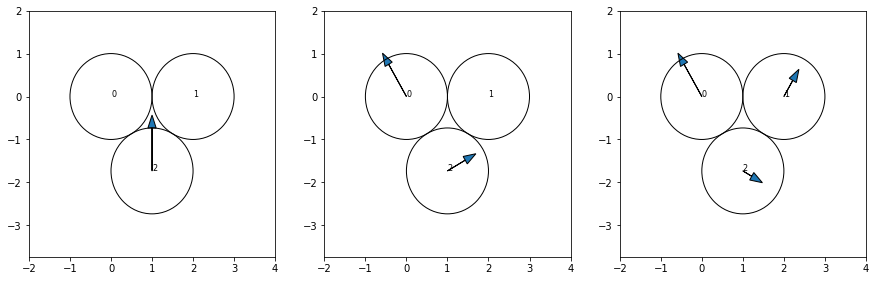

In [78]:
fig, ax = plt.subplots(1, len(step), figsize = (len(step)*5, 5))
for i in range(len(step)):
    PM.visualize(center_x, center_y, v_xs[i], v_ys[i], r, ax[i])

In [79]:
i = 2
j = 1
v_x = v_xs[2]
v_y = v_ys[2]
v_x[i] * (center_x[j]-center_x[i])

0.2165063509461097

In [80]:
v_x[i] - v_x[j]

-5.551115123125783e-17

In [84]:
v_y[i] - v_y[j]

-0.5000000000000003

In [61]:
r = 1
delta = 0.01
center_x = np.array([0, 2, 1])
center_y = np.array([0, 0, -2])
v_x = np.array([0, 0, 0.3])
v_y = np.array([0, 0, 1])
xs = [center_x]
ys = [center_y]

i = 2
j = 0

(v_y[i] * (center_y[j]-center_y[i])) > 0 or (v_x[i] * (center_x[j]-center_x[i])) > 0


True

In [56]:
v_x[i] * (center_x[j]-center_x[i])

-0.3

testing 2 0
False
testing 2 1
True
2 , 1 can still collide
0
[]
testing 2 0
False
testing 2 1
True
2 , 1 can still collide
1
[]
testing 2 0
False
testing 2 1
True
2 , 1 can still collide
2
[]
testing 2 0
False
testing 2 1
True
2 , 1 can still collide
3
[]
testing 2 0
False
testing 2 1
True
2 , 1 can still collide
4
[]
testing 2 0
False
testing 2 1
True
2 , 1 can still collide
5
[[1, 2]]
testing 2 0
False
testing 2 1
True
2 , 1 can still collide
6
[]
testing 2 0
False
testing 2 1
True
2 , 1 can still collide
7
[]
testing 2 0
False
testing 2 1
True
2 , 1 can still collide
8
[]
testing 2 0
False
testing 2 1
True
2 , 1 can still collide
9
[]
testing 2 0
False
testing 2 1
True
2 , 1 can still collide
10
[]
testing 2 0
False
testing 2 1
True
2 , 1 can still collide
11
[]
testing 2 0
False
testing 2 1
True
2 , 1 can still collide
12
[[0, 2]]
testing 2 0
False
testing 2 1
True
2 , 1 can still collide
13
[]
testing 2 0
False
testing 2 1
True
2 , 1 can still collide
14
[]
testing 2 0
False
testi

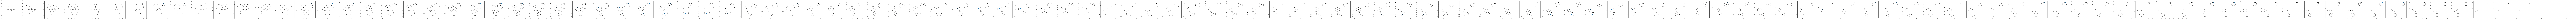

In [52]:
r = 1
delta = 0.01
center_x = np.array([0, 2, 1])
center_y = np.array([0, 0, -2])
v_x = np.array([0, 0, 0.3])
v_y = np.array([0, 0, 1])
xs = [center_x]
ys = [center_y]

this_x = np.copy(v_x).astype('float64')
this_y = np.copy(v_y).astype('float64')
v_xs = [this_x]
v_ys = [this_y]

step = 0
resolution = 0.05
while collidable(center_x, center_y, v_x, v_y, r) == True:
#     collide
    print(step)
    edges = rough_edges(center_x, center_y)
    collide = PM.all_collision(edges, center_x, center_y, v_x, v_y, r)
    print(collide)
    if len(collide) > 0:
        i = collide[0][0]
        j = collide[0][1]
        this_x, this_y = PM.perform_collision(i, j, edges, center_x, center_y, this_x, this_y)
    
#     move
    
    v_xs.append(this_x)
    v_ys.append(this_y)
    step += 1
    center_x = this_x*resolution + center_x
    center_y = this_y*resolution + center_y
    xs.append(center_x)
    ys.append(center_y)
        
fig, ax = plt.subplots(1, step, figsize = (step*5, 5))
for i in range(step):
    PM.visualize(xs[i], ys[i], v_xs[i], v_ys[i], r, ax[i])

Total Collision: 6


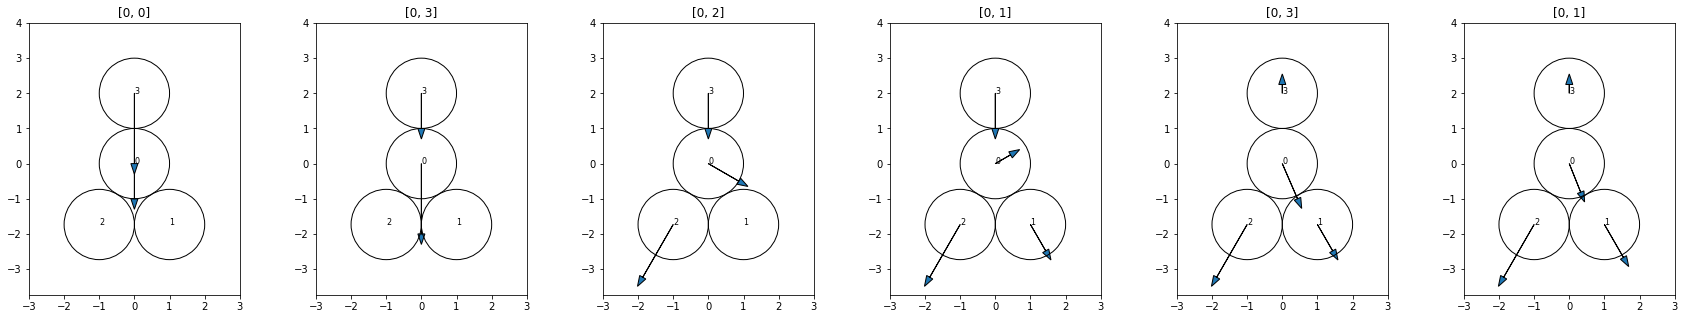

In [4]:
r = 1
center_x = [0, 1, -1, 0]
center_y = [0, -np.sqrt(3), -np.sqrt(3), 2]
v_x = [0, 0, 0, 0]
v_y = [-1, 0, 0, -2]
pinned_random_model(center_x, center_y, v_x, v_y, r)